In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import os
import shutil

In [3]:
path = '../data/datasets/meetup/'
events = os.path.join(path,'meta-events.csv')
members = os.path.join(path,'meta-members.csv')
groups = os.path.join(path,'meta-groups.csv')
rsvps = os.path.join(path,'rsvps.csv')
df_e =  pd.read_csv(events)
df_m = pd.read_csv(members)
df_r = pd.read_csv(rsvps)
hyperedges = {}

In [4]:
group_names = {}
group_cat = {}
numgroup_mems = {}
for f in pd.read_csv(groups).iterrows():
    g_id = f[1][0]
    g_name = f[1][1]
    numgroup_mems[g_id] = f[1][2]
    group_names[g_id] = g_name
    group_cat[g_id] = f[1][4]

In [5]:
event_names = {}
event_togroup = {}
for f in df_e.iterrows():
    e_id = f[1][0]
    e_name = f[1][2]
    event_names[e_id] = e_name
    event_togroup[e_id] = f[1][1]

In [6]:
member_names = {}
for f in df_m.iterrows():
    m_id = f[1][0]
    m_name = f[1][1]
    member_names[m_id] = m_name

In [8]:
attend_dict = {}
for f in df_r.iterrows():
    # print(f)
    ev_id = f[1][1]
    m_id = f[1][2]
    attend_dict[ev_id] = attend_dict.get(ev_id,[])+[m_id]
for f in df_m.iterrows():
    m_id = f[1][1]
    m_name = f[1][2]
    # print(m_id, ' ',m_name)

In [42]:
count=0
# max_participants = 5
# min_participants = 2
max_participants = 6
min_participants = 3
evids = []
evnames = []
partids = []
partnames = []
from Hypergraph import Hypergraph
for ev_id,v in attend_dict.items():
    if len(v)>=min_participants and len(v)<=max_participants:
        evids.append(ev_id)
        evnames.append(event_names[ev_id])
        partids.append(v)
        
        pnames = [member_names.get(x,"None") for x in v]
        partnames.append(pnames)
        count+=1
        # print('event: ', event_names[ev_id],' participants: ',v,' names: ',pnames)
print("hyperedges: ",count)
H = Hypergraph({x: v for x,v in enumerate(partids)})

hyperedges:  5988


In [43]:
def save_pickle(ob, fname):
    with open (fname, 'wb') as f:
        #Use the dump function to convert Python objects into binary object files
        pickle.dump(ob, f)

with open('../data/datasets/real/meetup.hyp','w') as wf:
    s=""
    for edge in partids:
        s_e = []
        for u in edge:
            s_e.append(str(u))
        wf.write(",".join(s_e))
        wf.write("\n")

Case-studyII
---

In [53]:
count=0
# max_participants = 5
# min_participants = 2
max_participants = 100
min_participants = 3
evids = []
evnames = []
partids = []
partnames = []
from Hypergraph import Hypergraph
visited = {}
for ev_id,v in attend_dict.items():
    if len(v)>=min_participants and len(v)<=max_participants:
        v_str = [p for p in map(str,sorted(v))]
        if ",".join(v_str) in visited:
            continue
        else:
            visited[",".join(v_str)] = True
            evids.append(ev_id)
            evnames.append(event_names[ev_id])
            partids.append(v)

            pnames = [member_names.get(x,"None") for x in v]
            partnames.append(pnames)
            count+=1
        # print('event: ', event_names[ev_id],' participants: ',v,' names: ',pnames)
print("hyperedges: ",count)
H = Hypergraph({x: v for x,v in enumerate(partids)})

with open('../data/datasets/real/meetup.hyp','w') as wf:
    s=""
    for edge in partids:
        s_e = []
        for u in edge:
            s_e.append(str(u))
        wf.write(",".join(s_e))
        wf.write("\n")

        
with open('../data/datasets/real/meetup_eidtoevent.csv','w',encoding='utf-8') as wf:
    # for e in evids:
    s = "\n".join([e for e in evnames])
    wf.write(s)
# save_pickle("\n".join([e for e in evnames]),'../data/datasets/real/meetup_eidtoevent.map')
_d = {}
i = 0
for _i, _e in zip(evids,evnames):
    _d[str(i)] = (_i,_e)
    i+=1
save_pickle(_d,'../data/datasets/real/meetup_eidtoevent.map')

hyperedges:  11027


In [54]:
print('N = ',len(H.nodes()))
print('E= ',len(H.edges()))

N =  24115
E=  11027


In [185]:
import random
N = len(H.init_nodes)

def generate_randomE(num=1000, max_e = 4):
    cnt = 0
    visited = {x:False for x in H.nodes()}
    for i in range(num):
        subedges = []
        x = random.randint(0,N-1)
        seednode = H.init_nodes[x]
        while visited[H.init_nodes[x]]:
            x = random.randint(0,N-1)
            seednode = H.init_nodes[x]
        visited[x] = True
        print(seednode)
        count = 0
        while count<max_e:
            inc_edges =  H.inc_dict[seednode]
            for e_id in inc_edges:
                if count<max_e and e_id not in subedges:
                    subedges.append(e_id)
                    count+=1
            if(count<max_e):
                seednode = random.sample(H.init_nbr[seednode],1)[0]
#             if (len(subedges) == len(inc_edges)):
#                 break
#             else:
                
                # else:
                #     seeds = list(set(seed_candidates)-set(visited.keys()))
                #     if (len(seeds)<=1):
                #         try:
                #             seednode = seeds[0]
                #         except Exception as e:
                #             break
                    # else:
                    #     seednode = seeds[random.randint(0,len(seeds)-1)]
            # else:
            #     break
        print(subedges, ' ',[H.get_edge_byindex(e) for e in subedges])
        yield [H.get_edge_byindex(e) for e in subedges]
Ecand = []        
for randome in generate_randomE(20):
    Ecand.append(randome)

229027906
[5419, 5385, 5388, 5390]   [[5900662, 229027906], [13008681, 5900662], [236163083, 5900662, 228862504, 238912542], [227282269, 5900662, 158781422, 238377640]]
22199791
[1875, 5705, 1878, 5371]   [[22199791, 69568352], [193843444, 53695782, 69568352, 11428300], [195231923, 154821192, 69568352, 194946818], [198478842, 195831058, 69568352]]
199373195
[2169, 2705, 5170, 1144]   [[199373195, 59643462], [190055719, 59643462, 1720391, 10734674], [158910422, 59643462], [59643462, 11759637]]
205986160
[2554, 2542, 2543, 2545]   [[193701350, 155888802, 205986160, 1952821], [236123449, 155888802, 1952821], [2491285, 155888802, 97152212, 1952821], [35235252, 219105350, 155888802, 1952821]]
4128698
[5753, 5191, 3007, 4661]   [[4128698, 200750517, 15369081], [4128698, 187334729, 185874155, 44942272], [185874155, 34583172], [209493826, 65541132, 200750517]]
219985470
[6383, 5655, 6400, 5761]   [[223312572, 14248408, 232898141, 219985470], [224088432, 10358025, 219985470], [222239470, 223312

C:\Users\naheedanjum.arafat\AppData\Local\Temp\ipykernel_20632\2991567190.py:24: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  seednode = random.sample(H.init_nbr[seednode],1)[0]


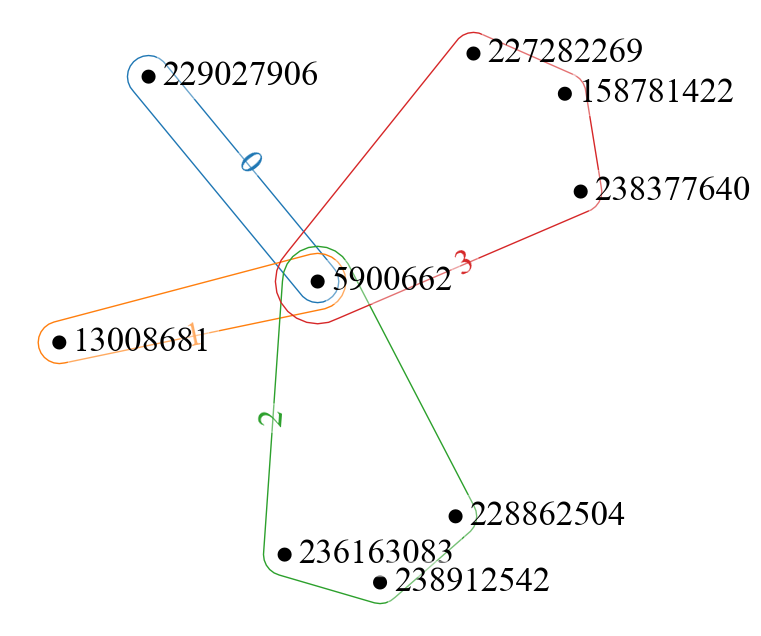

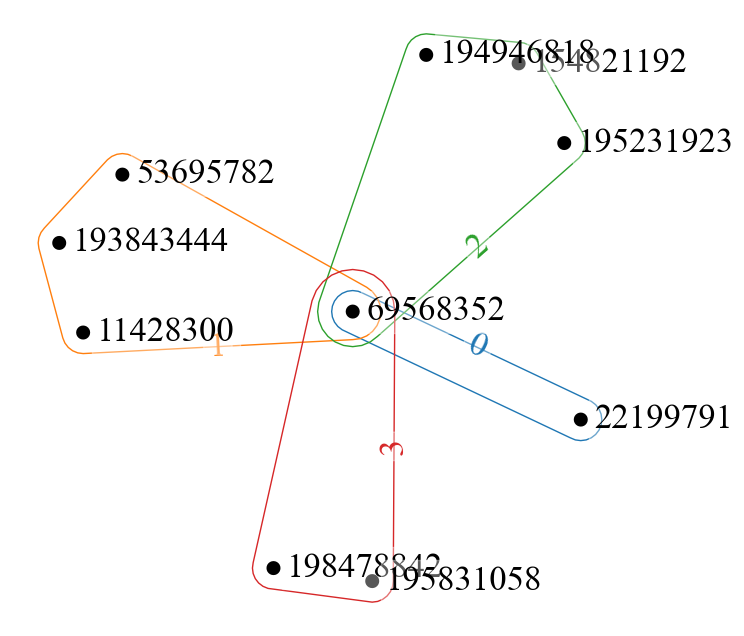

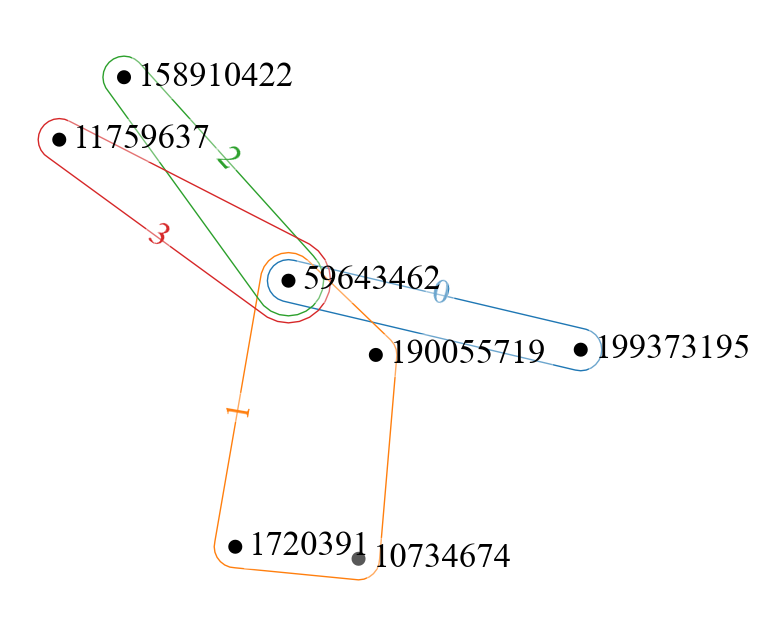

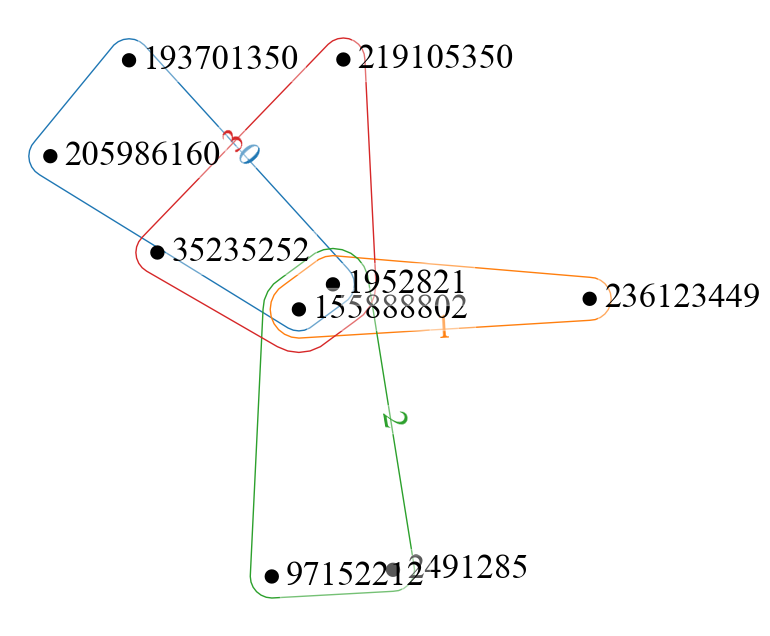

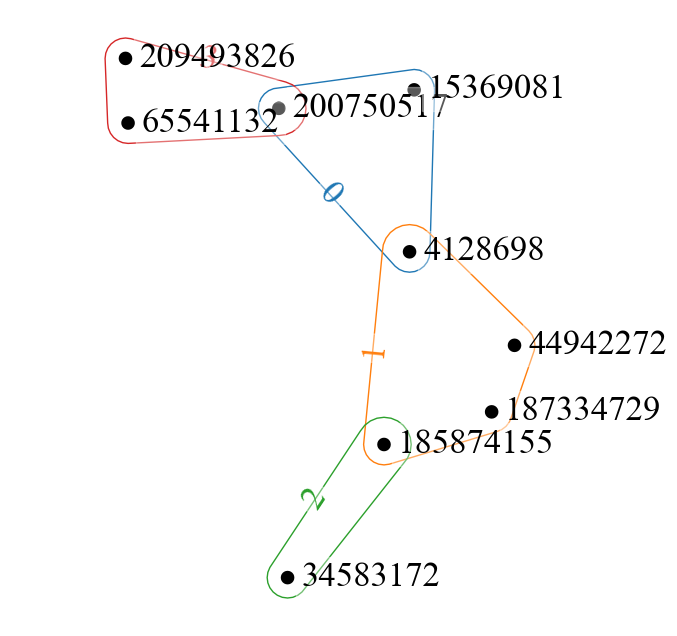

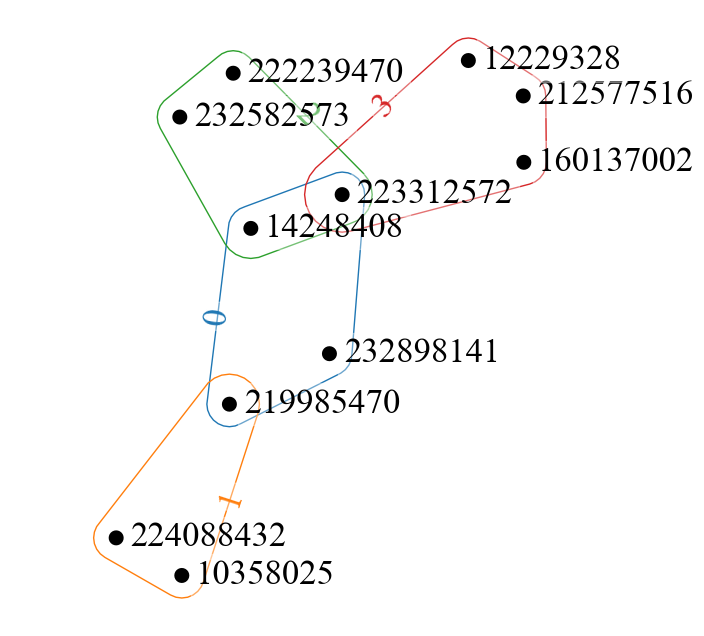

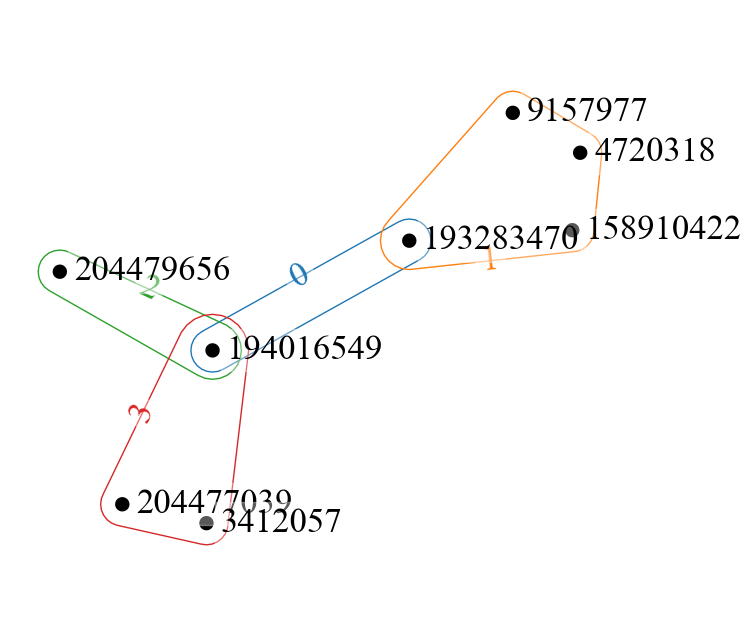

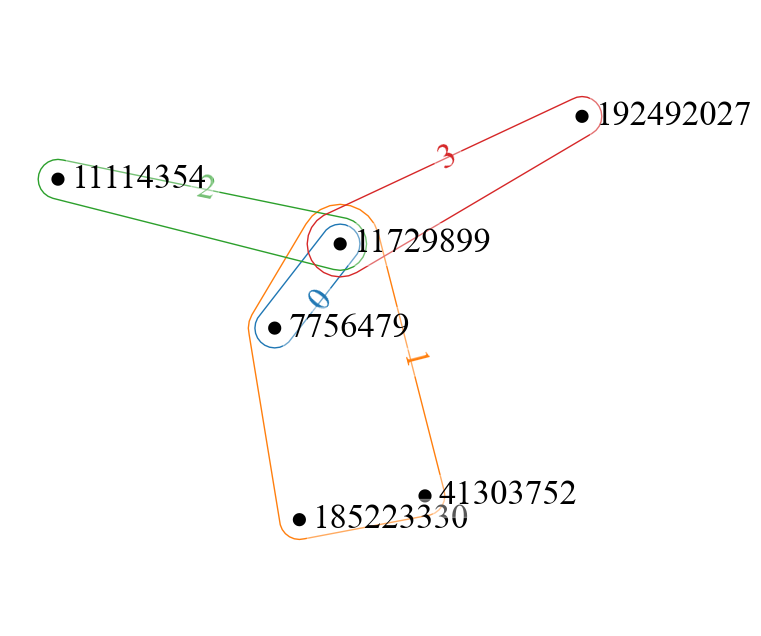

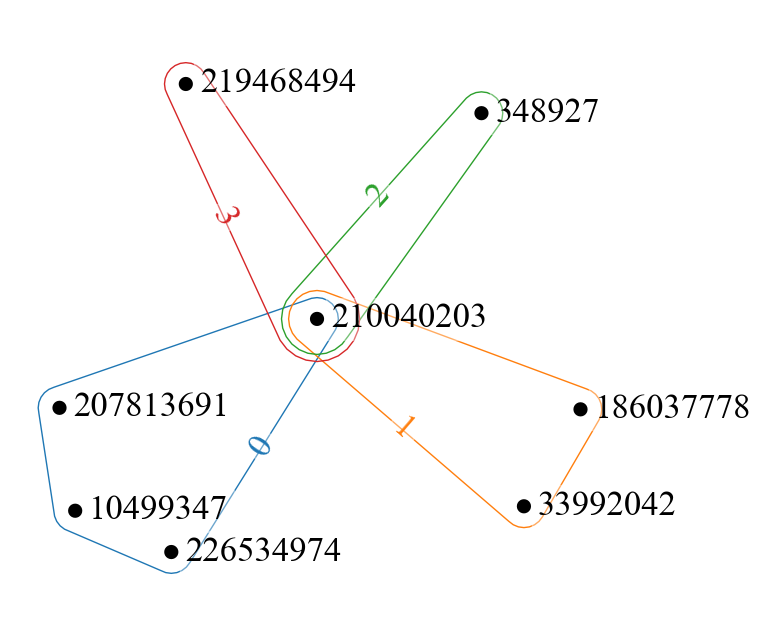

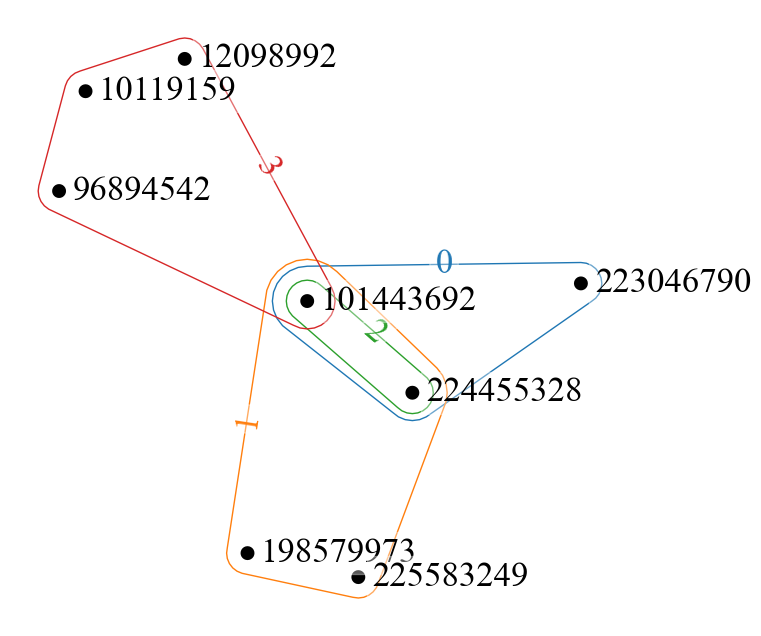

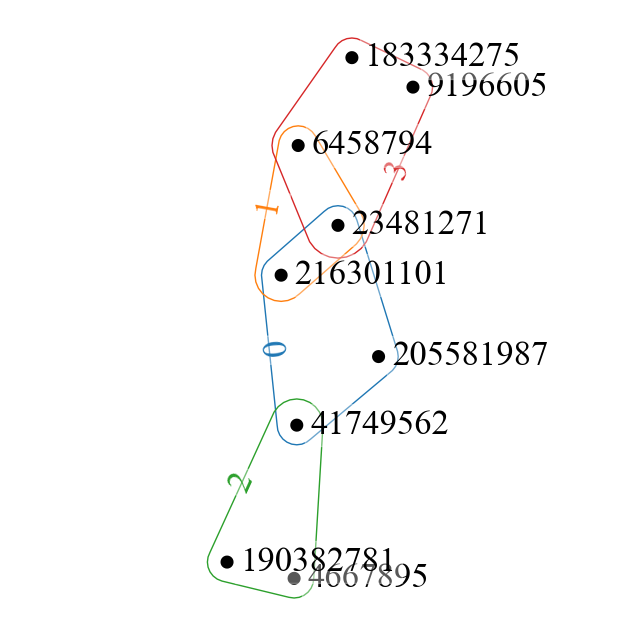

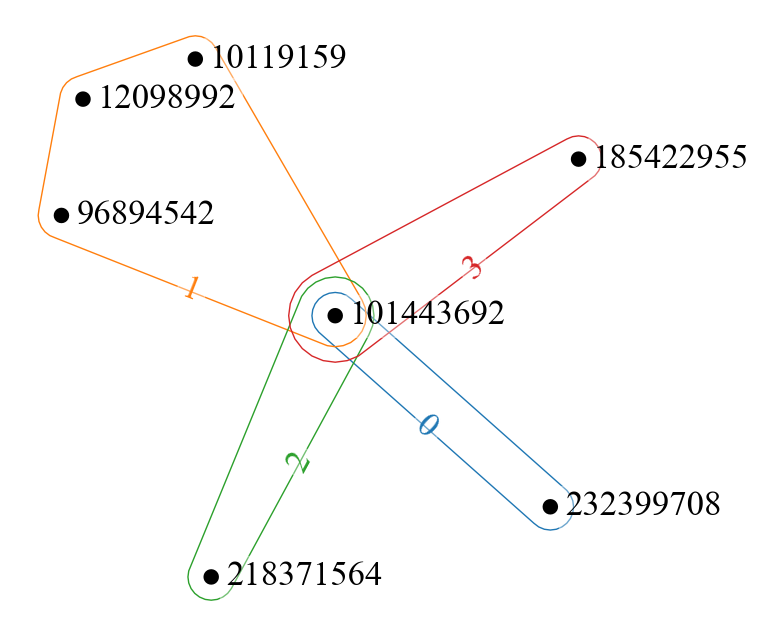

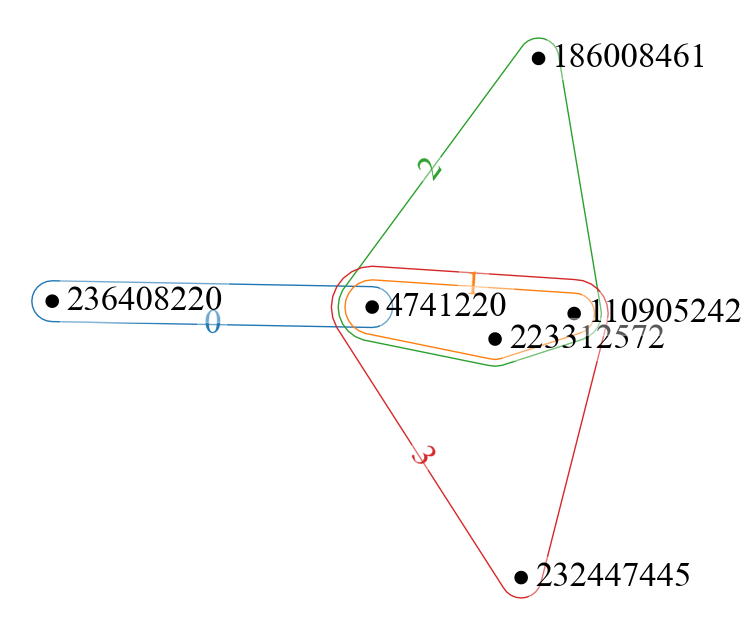

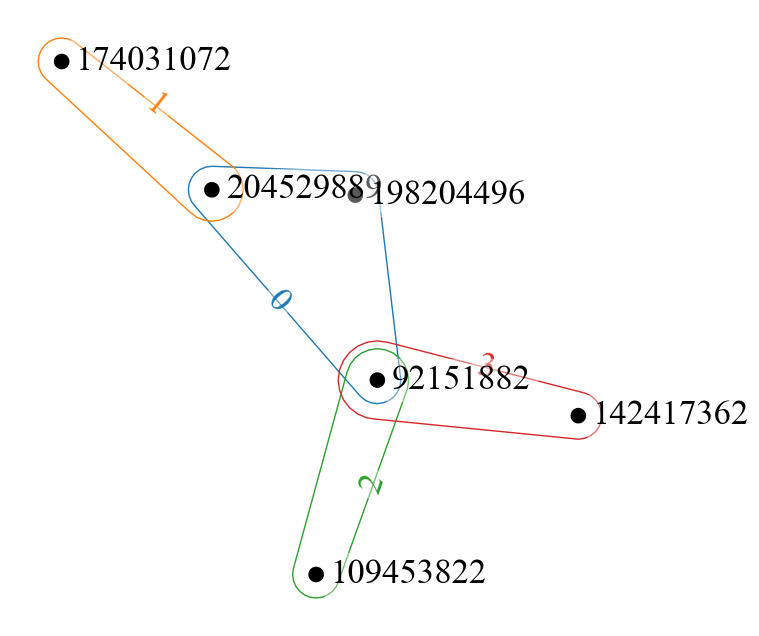

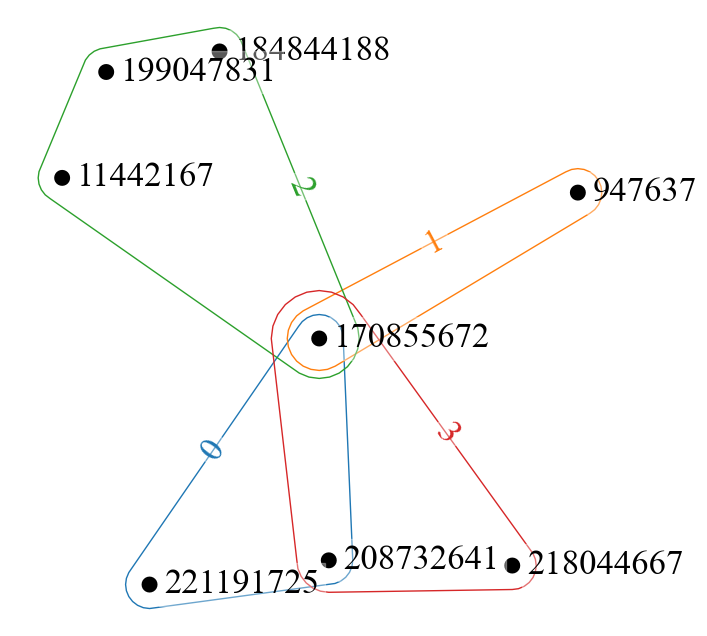

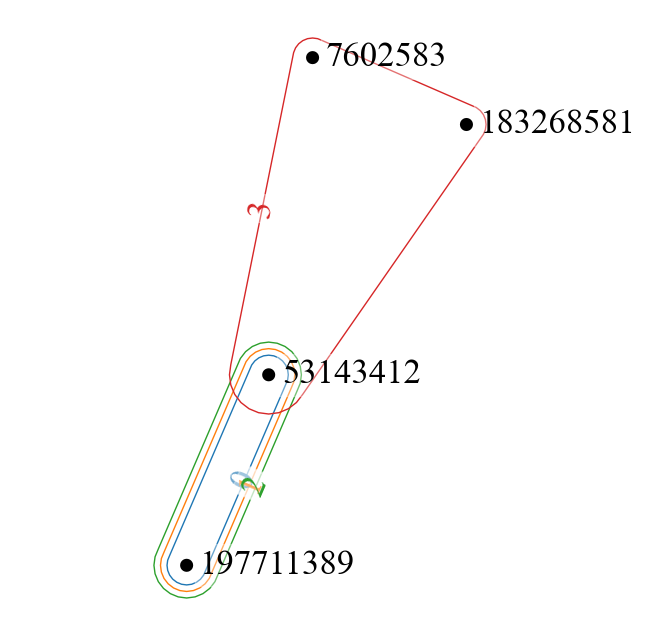

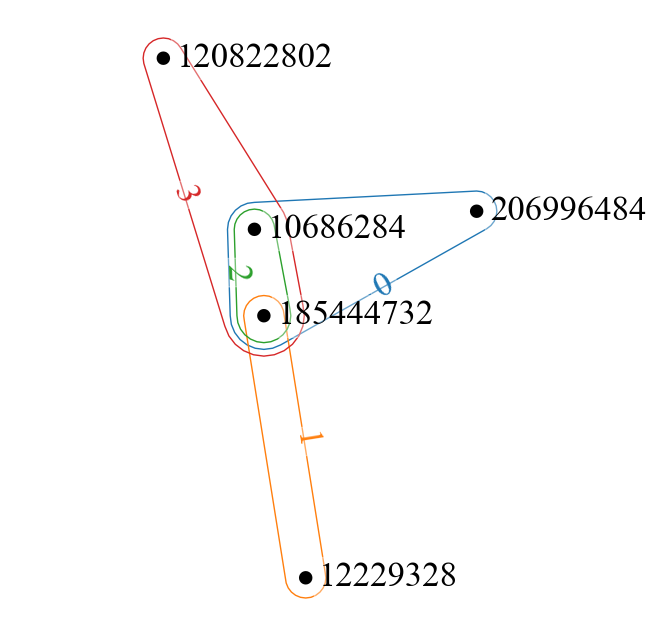

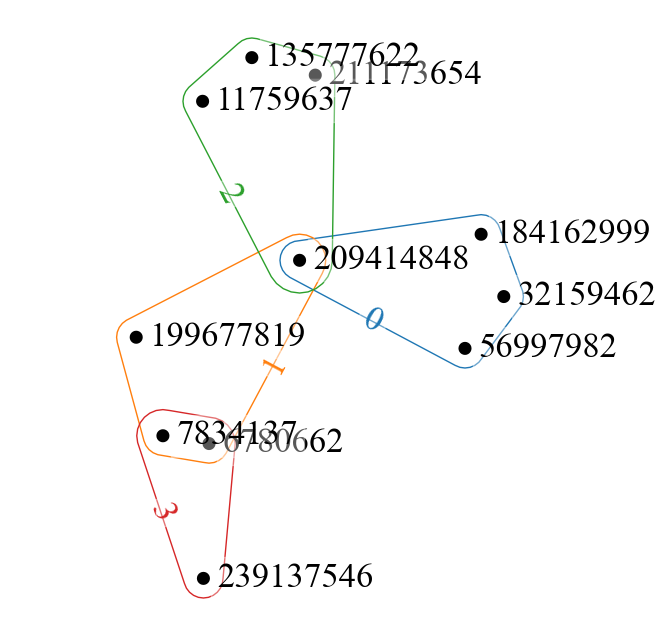

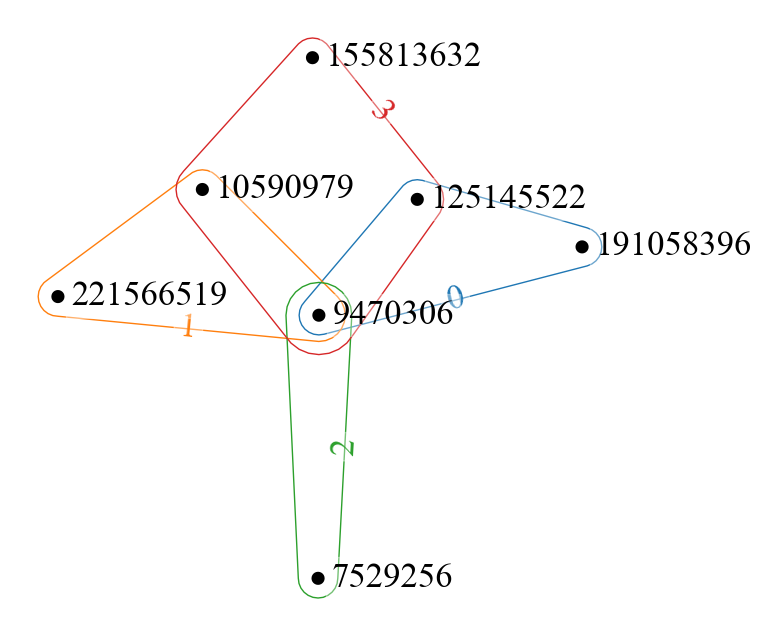

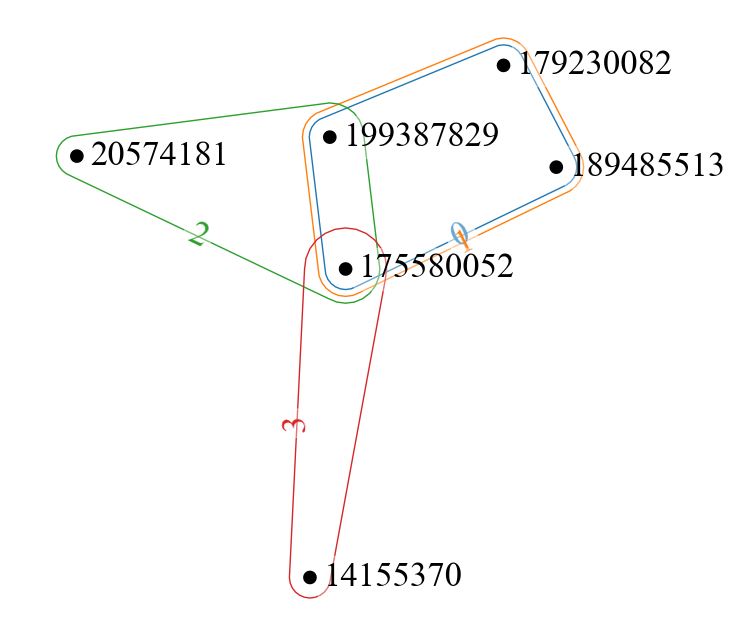

In [415]:
import hypernetx as hnx
for E in Ecand:
    Hy = hnx.Hypergraph({i: x for i,x in enumerate(E)})
    hnx.draw(Hy)
    plt.show()
    plt.close()

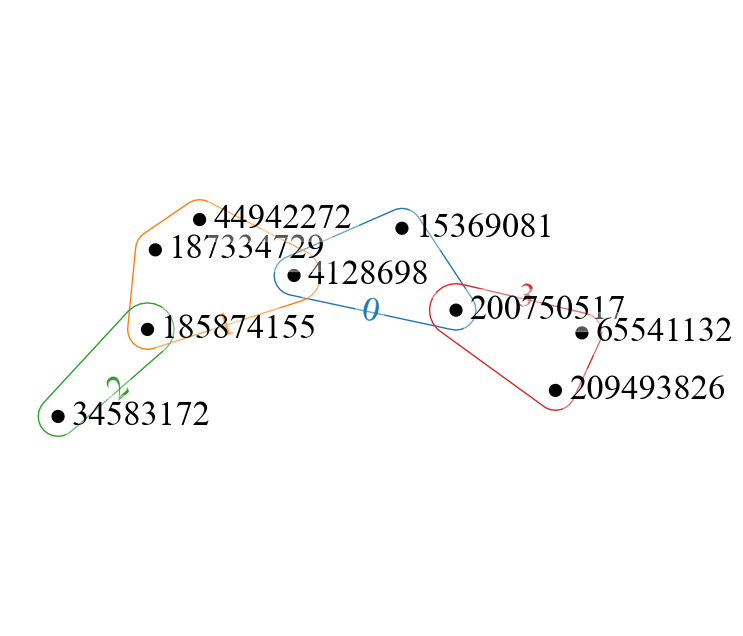

['Carrie Jeffries', 'M Bri Wyatt', 'Porsche Bailey-Brown']
['Carrie Jeffries', 'JoAnn Washington', 'Kath WILLIAMS', 'Mark Tune']
['Kath WILLIAMS', 'Robin Barnes']
['Kristi', 'Lisa Ernst', 'M Bri Wyatt']


In [324]:
Hy = hnx.Hypergraph({i: x for i,x in enumerate(Ecand[4])})
hnx.draw(Hy)
plt.show()
plt.close()
for e in Ecand[4]:
    deanon = [member_names[m] for m in e]
        # print(member_names[m])
    print(deanon)

In [348]:
print(Ecand[4])

[[4128698, 200750517, 15369081], [4128698, 187334729, 185874155, 44942272], [185874155, 34583172], [209493826, 65541132, 200750517]]


In [346]:
eventids = [5753, 5191, 3007, 4661]
for eid in eventids:
    print('event:', evids[eid],'\n\revent name: ',event_names[evids[eid]],'.\n\t group: ',group_names[event_togroup[evids[eid]]],'.\n\t cat:',\
          group_cat[event_togroup[evids[eid]]], '\n\t #members: ',numgroup_mems[event_togroup[evids[eid]]],'.\n\t paricipants: ',\
          attend_dict[evids[eid]], [member_names[m] for m in attend_dict[evids[eid]]])
    print('-----')

event: 239264629 
event name:  Planning with Michael's .
	 group:  Women's  Business Network .
	 cat: Career & Business 
	 #members:  2163 .
	 paricipants:  [4128698, 200750517, 15369081] ['Carrie Jeffries', 'M Bri Wyatt', 'Porsche Bailey-Brown']
-----
event: 231175044 
event name:  Spy on Competitor's Traffic Sources to help you generate leads .
	 group:  Nashville Online Business Strategy Meetup .
	 cat: Career & Business 
	 #members:  1447 .
	 paricipants:  [4128698, 187334729, 185874155, 44942272] ['Carrie Jeffries', 'JoAnn Washington', 'Kath WILLIAMS', 'Mark Tune']
-----
event: 231263061 
event name:  Sound & Your Health .
	 group:  Wellness Nashville .
	 cat: Health & Wellbeing 
	 #members:  540 .
	 paricipants:  [185874155, 34583172] ['Kath WILLIAMS', 'Robin Barnes']
-----
event: gswsvlywgbfb 
event name:  Regular Weekly Meditation .
	 group:  One Dharma Nashville Meditation Group .
	 cat: New Age & Spirituality 
	 #members:  1191 .
	 paricipants:  [209493826, 65541132, 20075051

131


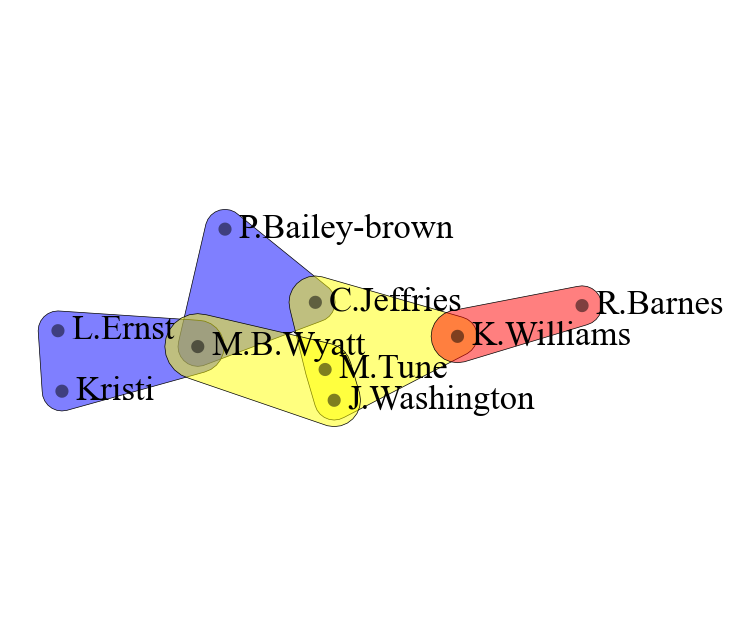

In [455]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import random

# fname = "../data/datasets/synthetic/default.hyp"
Edgelist = {}
with open(fname,'r') as fp:
    eid = 0
    for line in fp.readlines():
        line = line.strip().split(",")
        members = [member_names[int(m)].lower() for m in line]
        for i in range(len(members)):
            n = ""
            for j, name in enumerate(members[i].split()):
                if j<len(members[i].split())-1:
                    n+= (name[0].upper()+".")
                else:
                    n+= (name[0].upper()+name[1:])
            members[i] = n
        Edgelist[eid] = members
        eid+=1
# for eid in eventids:
#     members = [member_names[m].lower() for m in attend_dict[evids[eid]]]
#     for i in range(len(members)):
#         n = ""
#         for j, name in enumerate(members[i].split()):
#             if j<len(members[i].split())-1:
#                 n+= (name[0].upper()+".")
#             else:
#                 n+= (name[0].upper()+name[1:])
#         members[i] = n
#     print(members)
#     Edgelist[eid] = members
#     i+=1
Hyp = hnx.Hypergraph(Edgelist)
font = {
        'family': 'Times New Roman',
        'weight': 'normal',
        'size': 25
        }
plt.rc('font',**font)
cmap = plt.cm.viridis
alpha = .5


# sizes = np.array([1.0/random.randint(1,20) for e in H.edges()])
# norm = plt.Normalize(sizes.min(), sizes.max())
cnt = 0
while cnt < 1:
    cnt+=1
    # fig, (ax1,ax2) = plt.subplots(1,2)
    fig, ax1 = plt.subplots(1,1)
    # ax1 = fig.add_subplot(1,1,1)
    # i = random.randint(0,10000)
    # i = 7587
    i = 131
    print(i)
    hnx.draw(Hyp, ax = ax1,
                     label_alpha=0,
                     edges_kwargs={
                         'facecolors': [(0,0,1,alpha),  (1, 1, 0, alpha), (1,0,0, alpha)],
                         'edgecolors': 'black',
                         'linewidths': 0.5
                     },
                     nodes_kwargs = {
                        #  'node_radius': 2,
                         'facecolors': (0,0,0, alpha)
                    },
                     layout_kwargs = {'seed': i},
                    with_edge_labels = False, 
                    with_node_labels = True,
                    node_radius = 1)
    # plt.savefig('tmp/intro'+str(i)+".png")
    # plt.close()
    fig.savefig('intro.pdf',bbox_inches = 'tight')
    fig.savefig('intro.svg',bbox_inches = 'tight') #558 8447 8890 8443